How does density affect happiness? Density is population divided by area and it represents how much a country is packed


Importing libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Readinf the data set

In [139]:
df_happinies_2015 = pd.read_csv('2015.csv')
df_happinies_2016 = pd.read_csv('2016.csv')
df_happinies_2017 = pd.read_csv('2017.csv')
df_happinies_2018 = pd.read_csv('2018.csv')
df_happinies_2019 = pd.read_csv('2019.csv')
df_250_Country_Data = pd.read_csv('250 Country Data.csv')

adding a year column for each data set to prepare it for the integration

In [140]:
last_column_2015 = len(df_happinies_2015)*[2015]
last_column_2016 = len(df_happinies_2016)*[2016]
last_column_2017 = len(df_happinies_2017)*[2017]
last_column_2018 = len(df_happinies_2018)*[2018]
last_column_2019 = len(df_happinies_2019)*[2019]
df_Years_2015 = pd.DataFrame({'Year': last_column_2015})
df_Years_2016 = pd.DataFrame({'Year': last_column_2016})
df_Years_2017 = pd.DataFrame({'Year': last_column_2017})
df_Years_2018= pd.DataFrame({'Year': last_column_2018})
df_Years_2019 = pd.DataFrame({'Year': last_column_2019})

In [141]:
df_happinies_2015=pd.concat([df_happinies_2015, df_Years_2015],axis=1)


In [142]:
df_happinies_2016=pd.concat([df_happinies_2016, df_Years_2016],axis=1)



In [143]:
df_happinies_2017_WithLastColumn=pd.concat([df_happinies_2017, df_Years_2017],axis=1)


In [144]:
df_happinies_2018_WithLastColumn =pd.concat([df_happinies_2018, df_Years_2018],axis=1)


In [145]:
df_happinies_2019_WithLastColumn=pd.concat([df_happinies_2019, df_Years_2019],axis=1)
df_happinies_2019

,Unnamed: 0,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2
...,...,...,...,...,...,...,...,...,...,...,...
151,151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.172,0
152,152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0
153,153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0
154,154,155,Central African Republic,3.083,0.026,1.427,0.105,0.225,0.235,0.035,0


Integration the  years happiness datasets

In [146]:
df_happinies_2019 = pd.merge(df_happinies_2019_WithLastColumn,df_happinies_2015[['Region','Country']], on = "Country")
df_happinies_2018 = pd.merge(df_happinies_2018_WithLastColumn,df_happinies_2015[['Region','Country']], on = "Country")
df_happinies_2017 = pd.merge(df_happinies_2017_WithLastColumn,df_happinies_2015[['Region','Country']], on = "Country")
# df_2019_with_Region.to_csv("df_2019_with_Region.csv")
# df_2018_with_Region.to_csv("df_2018_with_Region.csv")
# df_2017_with_Region.to_csv("df_2017_with_Region.csv")

Integrated_Happiness = pd.concat([(pd.concat([(pd.concat([(pd.concat([df_happinies_2015[['Region','Country',"Happiness Rank",
                                "Happiness Score","Economy (GDP per Capita)","Social support","Healthy life expectancy",
                                "Freedom to make life choices","Trust (Government Corruption)","Generosity","Cluster","Year"]], df_happinies_2016[['Region','Country',"Happiness Rank",
                                "Happiness Score","Economy (GDP per Capita)","Social support","Healthy life expectancy",
                                "Freedom to make life choices","Trust (Government Corruption)","Generosity","Cluster","Year"]]], axis=0)),
                                   df_happinies_2017[['Region','Country',"Happiness Rank",
                                "Happiness Score","Economy (GDP per Capita)","Social support","Healthy life expectancy",
                                "Freedom to make life choices","Trust (Government Corruption)","Generosity","Cluster","Year"]]], axis = 0)),
           df_happinies_2018[['Region','Country',"Happiness Rank",
                                "Happiness Score","Economy (GDP per Capita)","Social support","Healthy life expectancy",
                                "Freedom to make life choices","Trust (Government Corruption)","Generosity","Cluster","Year"]]], axis = 0)),
                df_happinies_2019[['Region','Country',"Happiness Rank",
                                "Happiness Score","Economy (GDP per Capita)","Social support","Healthy life expectancy",
                                "Freedom to make life choices","Trust (Government Corruption)","Generosity","Cluster","Year"]]], axis = 0)
Integrated_Happiness.reset_index(inplace=True)
Integrated_Happiness.to_csv("Integrated_Happiness.csv")

Integrated_Happiness

,index,Region,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Cluster,Year
0,0,Western Europe,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2,2015
1,1,Western Europe,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2,2015
2,2,Western Europe,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2,2015
3,3,Western Europe,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2,2015
4,4,North America,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,144,Middle East and Northern Africa,Yemen,151,3.380,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,0,2019
759,145,Sub-Saharan Africa,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.17200,0.21700,0,2019
760,146,Sub-Saharan Africa,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0,2019
761,147,Southern Asia,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,0,2019


Integrating the 5 years happiness datasets with the country dataset

In [147]:
Inegrated_data = pd.merge(Integrated_Happiness, df_250_Country_Data,left_on="Country", right_on="name", how='left')
# Inegrated_data_1 = pd.merge(df_2019_with_Region, df_250_Country_Data,left_on="Country", right_on="name", how='left')
# Inegrated_data.drop(columns=["Unnamed: 0_x"],inplace = True)
Inegrated_data.drop(columns=["Unnamed: 0"],inplace = True)
Inegrated_data.drop(columns=["Unnamed: 0.1"],inplace = True)
Inegrated_data.drop(columns=["Region"],inplace = True)
Inegrated_data.drop(columns=["name"],inplace = True)
Inegrated_data=Inegrated_data[~Inegrated_data['region'].isnull()]
print(Inegrated_data.isnull().sum())
Inegrated_data

index                            0
Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Trust (Government Corruption)    0
Generosity                       0
Cluster                          0
Year                             0
region                           0
subregion                        0
population                       0
area                             0
dtype: int64


,index,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Cluster,Year,region,subregion,population,area
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2,2015,Europe,Western Europe,8341600.0,41284.0
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2,2015,Europe,Northern Europe,334300.0,103000.0
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2,2015,Europe,Northern Europe,5717014.0,43094.0
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2,2015,Europe,Northern Europe,5223256.0,323802.0
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2,2015,Americas,Northern America,36155487.0,9984670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,144,Yemen,151,3.380,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,0,2019,Asia,Western Asia,27478000.0,527968.0
759,145,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.17200,0.21700,0,2019,Africa,Eastern Africa,11553188.0,26338.0
760,146,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0,2019,Africa,Central Africa,56320000.0,945087.0
761,147,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,0,2019,Asia,Southern Asia,27657145.0,652230.0


In [148]:
# print(Inegrated_data_1)

adding a density column for the integrated dataset

In [149]:
# Inegrated_data_1["density"] = Inegrated_data_1["population"]/Inegrated_data_1["area"]
Inegrated_data["density"] = Inegrated_data["population"]/Inegrated_data["area"]


finding the min, max of the density to discritize the density column

In [150]:
minvalue = Inegrated_data['density'].min()
print(minvalue)

0.033695128858680264


In [151]:
maxvalue = Inegrated_data['density'].max()
print(maxvalue)

7795.774647887324


discritization for the density column

In [152]:
density_group = pd.cut(Inegrated_data.density, [0,400,800,1200,1600,1800,2200,2600,3000,3400,3800,4200,4600,5000,5400,5800,6200,6600,7000,7400,7800],labels=
                       ["0-400" ,"400-800" ,"800-1200" , "1200-1600","1600-2000" , "2000-2400","2400-2800", "2800-3200" , "3200-3600", "3600-4000","4000-4400" ,"4400-4800",
                        "4800-5200" , "5200-5600" ,
                        "5600-6000" ,"6000-6400", "6400-6800", "6800-7200","7200-7600"  , "7600-8000"])
Inegrated_data["density_group"] = density_group 
del Inegrated_data["density"]


In [153]:
Inegrated_data

,index,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Cluster,Year,region,subregion,population,area,density_group
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2,2015,Europe,Western Europe,8341600.0,41284.0,0-400
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2,2015,Europe,Northern Europe,334300.0,103000.0,0-400
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2,2015,Europe,Northern Europe,5717014.0,43094.0,0-400
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2,2015,Europe,Northern Europe,5223256.0,323802.0,0-400
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2,2015,Americas,Northern America,36155487.0,9984670.0,0-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,144,Yemen,151,3.380,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,0,2019,Asia,Western Asia,27478000.0,527968.0,0-400
759,145,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.17200,0.21700,0,2019,Africa,Eastern Africa,11553188.0,26338.0,400-800
760,146,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0,2019,Africa,Central Africa,56320000.0,945087.0,0-400
761,147,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,0,2019,Asia,Southern Asia,27657145.0,652230.0,0-400


In [154]:
Inegrated_data.to_csv("Integrated_Happiness_Country_Data.csv")

plotting the relation between the happiness rank and the density 

No handles with labels found to put in legend.


,index,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Cluster,Year,region,subregion,population,area,density_group
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2,2015,Europe,Western Europe,8341600.0,41284.0,0-400
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2,2015,Europe,Northern Europe,334300.0,103000.0,0-400
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2,2015,Europe,Northern Europe,5717014.0,43094.0,0-400
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2,2015,Europe,Northern Europe,5223256.0,323802.0,0-400
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2,2015,Americas,Northern America,36155487.0,9984670.0,0-400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,144,Yemen,151,3.380,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,0,2019,Asia,Western Asia,27478000.0,527968.0,0-400
759,145,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.17200,0.21700,0,2019,Africa,Eastern Africa,11553188.0,26338.0,400-800
760,146,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0,2019,Africa,Central Africa,56320000.0,945087.0,0-400
761,147,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,0,2019,Asia,Southern Asia,27657145.0,652230.0,0-400


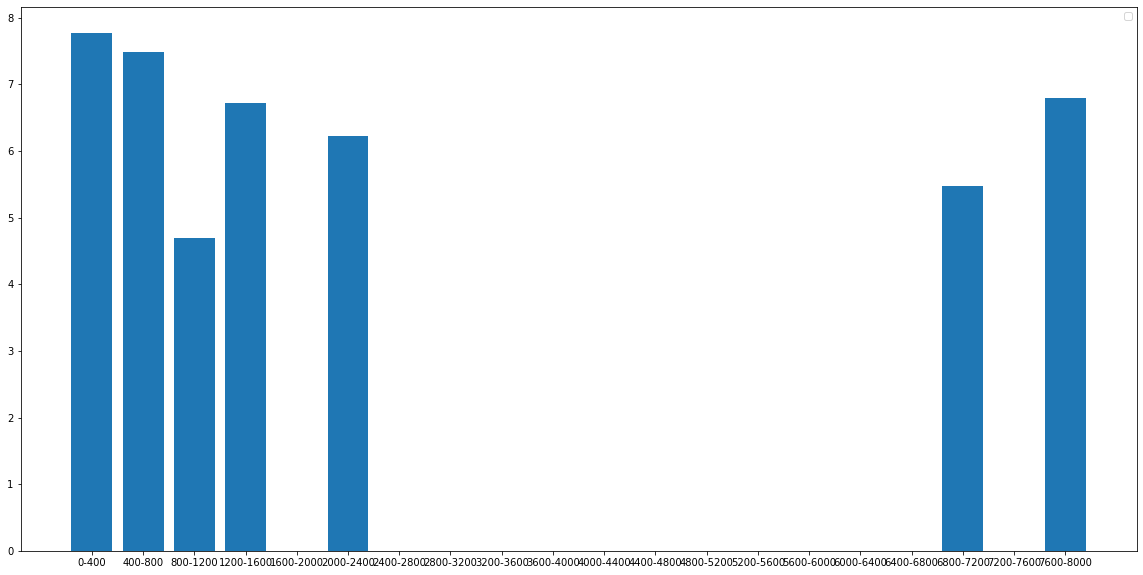

In [155]:
plt.figure(figsize=(20, 10))
l=pd.DataFrame(data = ["0-400" ,"400-800" ,"800-1200" , "1200-1600","1600-2000" , "2000-2400","2400-2800", "2800-3200" , "3200-3600", "3600-4000","4000-4400" ,"4400-4800",
                        "4800-5200" , "5200-5600" ,
                        "5600-6000" ,"6000-6400", "6400-6800", "6800-7200","7200-7600"  , "7600-8000"], columns = ["density_group"])
l= pd.merge(Inegrated_data[['Happiness Score','density_group']], l, how='right')
l['Happiness Score'].replace(np.nan,0 , inplace=True)
plt.bar( l["density_group"],l['Happiness Score'])
plt.legend(loc=1)
Inegrated_data

As we see in the figure above there's no relation between the density and the Happiness Score.
And that's reasonable as it depends on how the country can make use of its area, and there population.
the population could be human resources or a burden.
also the landarea, The country can make good use of its area.
So we conclude that there's no relation between the density and the happiness ranks